In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv(r'C:\Users\Magda\Downloads\najlepsze dane\marketing_data.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [5]:
df.shape

(2240, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [16]:
df.columns = df.columns.str.replace(' ', '')

In [22]:
df['Kids']=df['Kidhome']+df['Teenhome']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Kids
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,Spain,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,Canada,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,USA,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,Australia,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,Spain,1


In [29]:
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Kids
0,1826,1970,Graduation,Divorced,84835.0,2014-06-16,0,189,104,379,...,1,0,0,0,0,0,1,0,Spain,0
1,1,1961,Graduation,Single,57091.0,2014-06-15,0,464,5,64,...,5,0,0,0,0,1,1,0,Canada,0


In [35]:
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Other')

In [36]:
df[['Income','Kids']].describe()

,Income,Kids
count,2216.000000,2240.000000
mean,52247.251354,0.950446
std,25173.076661,0.751803
min,1730.000000,0.000000
25%,35303.000000,0.000000
50%,51381.500000,1.000000
75%,68522.000000,1.000000
max,666666.000000,3.000000


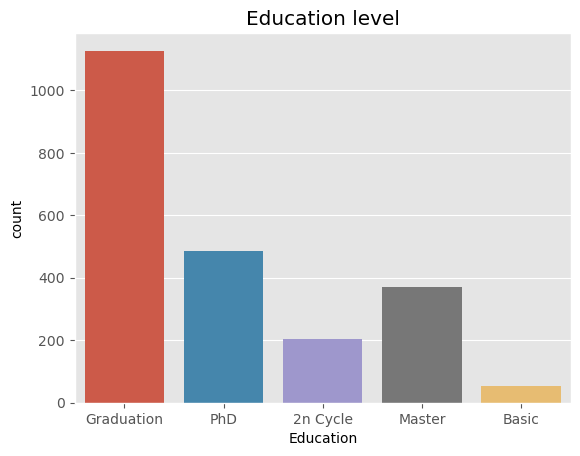

In [37]:
sns.countplot(x='Education', data=df)
plt.title("Education level")
plt.show()

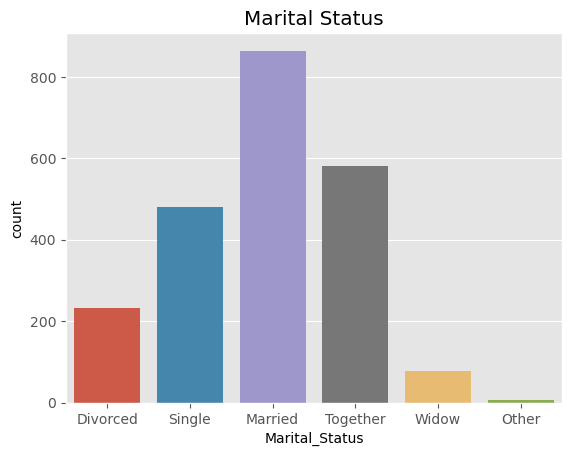

In [38]:
sns.countplot(x='Marital_Status', data=df)
plt.title('Marital Status')
plt.show()

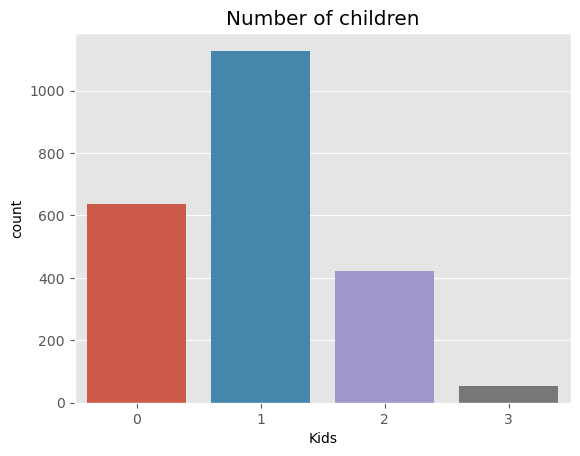

In [39]:
sns.countplot(x='Kids', data=df)
plt.title('Number of children')
plt.show()

In [41]:
df['Country'].unique()

array(['Spain', 'Canada', 'USA', 'Australia', 'Germany', 'India',
       'Saudi Arabia', 'Mexico'], dtype=object)

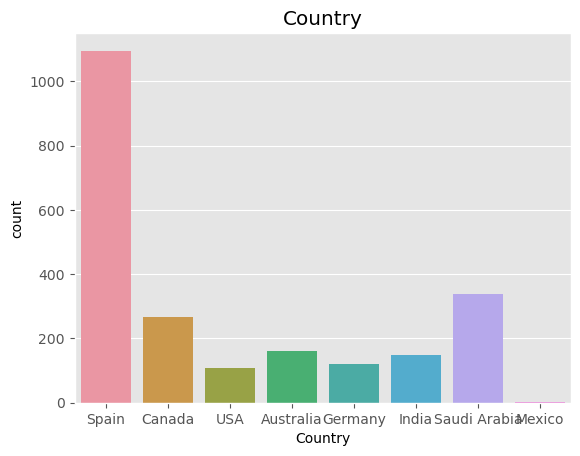

In [42]:
sns.countplot(x='Country', data=df)
plt.title('Country')
plt.show()

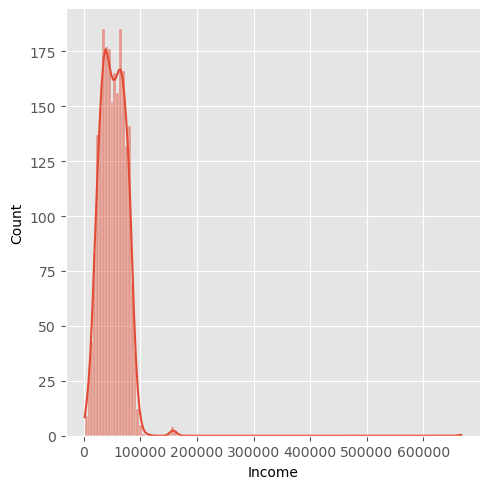

In [47]:
sns.displot(df['Income'], kde=True)

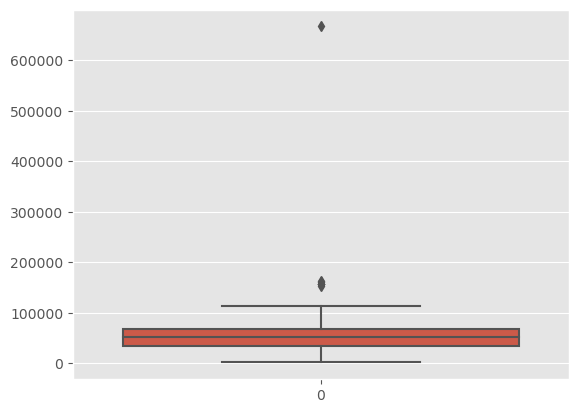

In [49]:
sns.boxplot(df['Income']);

In [63]:
print(np.where(df['Income']>600000))

(array([], dtype=int64),)


In [58]:
df.drop([527], axis=0, inplace=True)

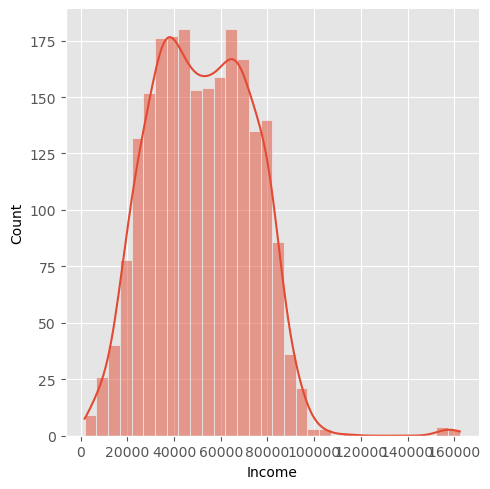

In [61]:
sns.displot(df['Income'], kde=True);

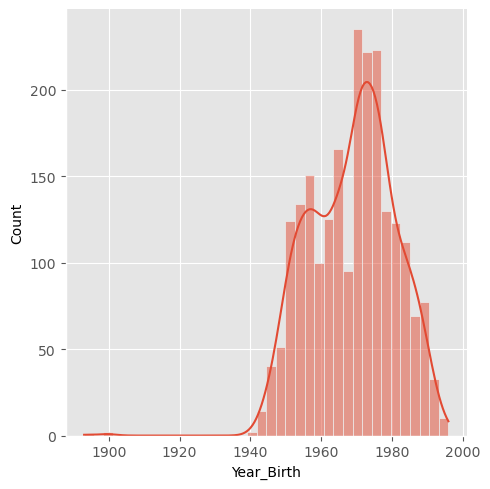

In [64]:
sns.displot(df['Year_Birth'], kde=True)

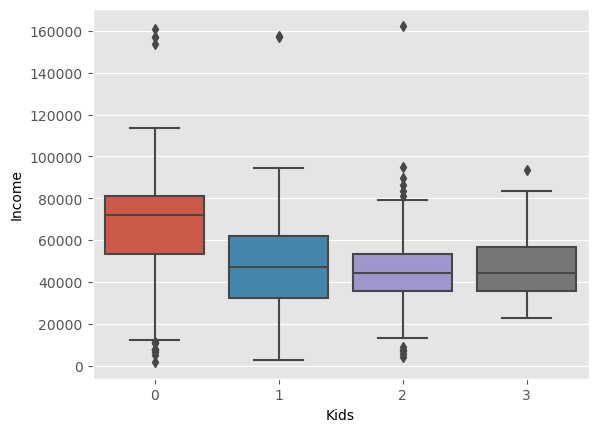

In [66]:
sns.boxplot(y=df['Income'], x=df['Kids'])
plt.show()

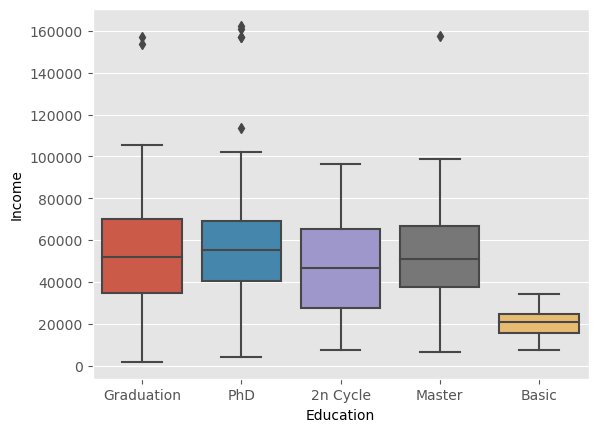

In [67]:
sns.boxplot(y=df['Income'], x=df['Education'])
plt.show()

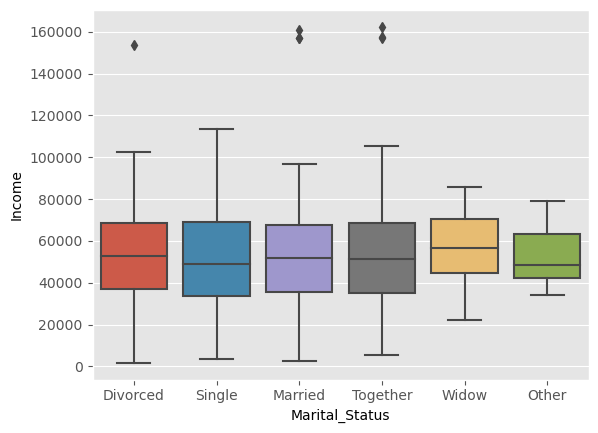

In [70]:
sns.boxplot(y=df['Income'], x=df['Marital_Status'])
plt.show()

In [74]:
df['TotalAmountSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + \
df['MntSweetProducts'] + df['MntGoldProds']

In [79]:
df[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds','TotalAmountSpent']]\
.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,304.067441,26.307727,167.016525,37.538633,27.074587,44.036177,606.041090
std,336.614830,39.781468,225.743829,54.637617,41.286043,52.174700,602.274089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,69.000000
50%,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,396.000000
75%,504.500000,33.000000,232.000000,50.000000,33.000000,56.000000,1046.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,2525.000000


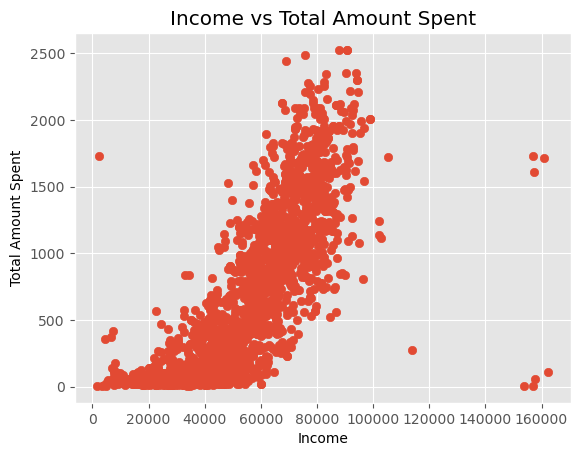

In [90]:
plt.scatter(x=df['Income'], y=df['TotalAmountSpent'])
plt.title('Income vs Total Amount Spent')
plt.xlabel('Income')
plt.ylabel('Total Amount Spent')
plt.show()

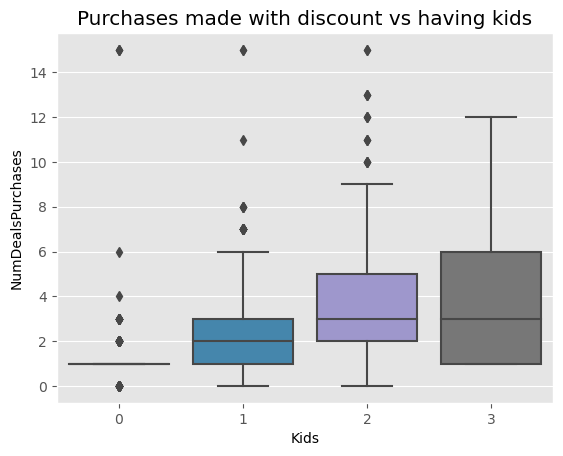

In [101]:
sns.boxplot(y=df['NumDealsPurchases'], x=df['Kids'])
plt.title('Purchases made with discount vs having kids')
plt.show()

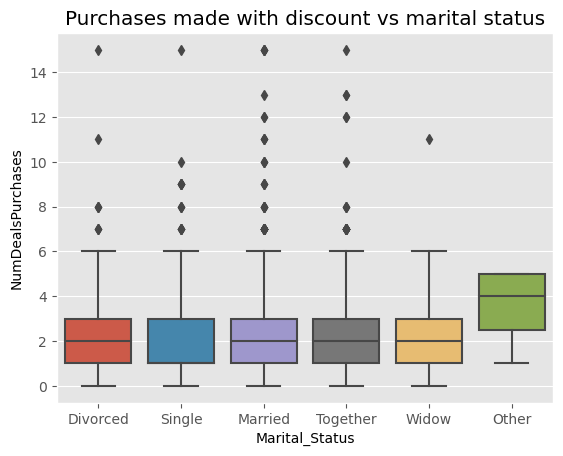

In [103]:
sns.boxplot(y=df['NumDealsPurchases'], x=df['Marital_Status'])
plt.title('Purchases made with discount vs marital status')
plt.show()

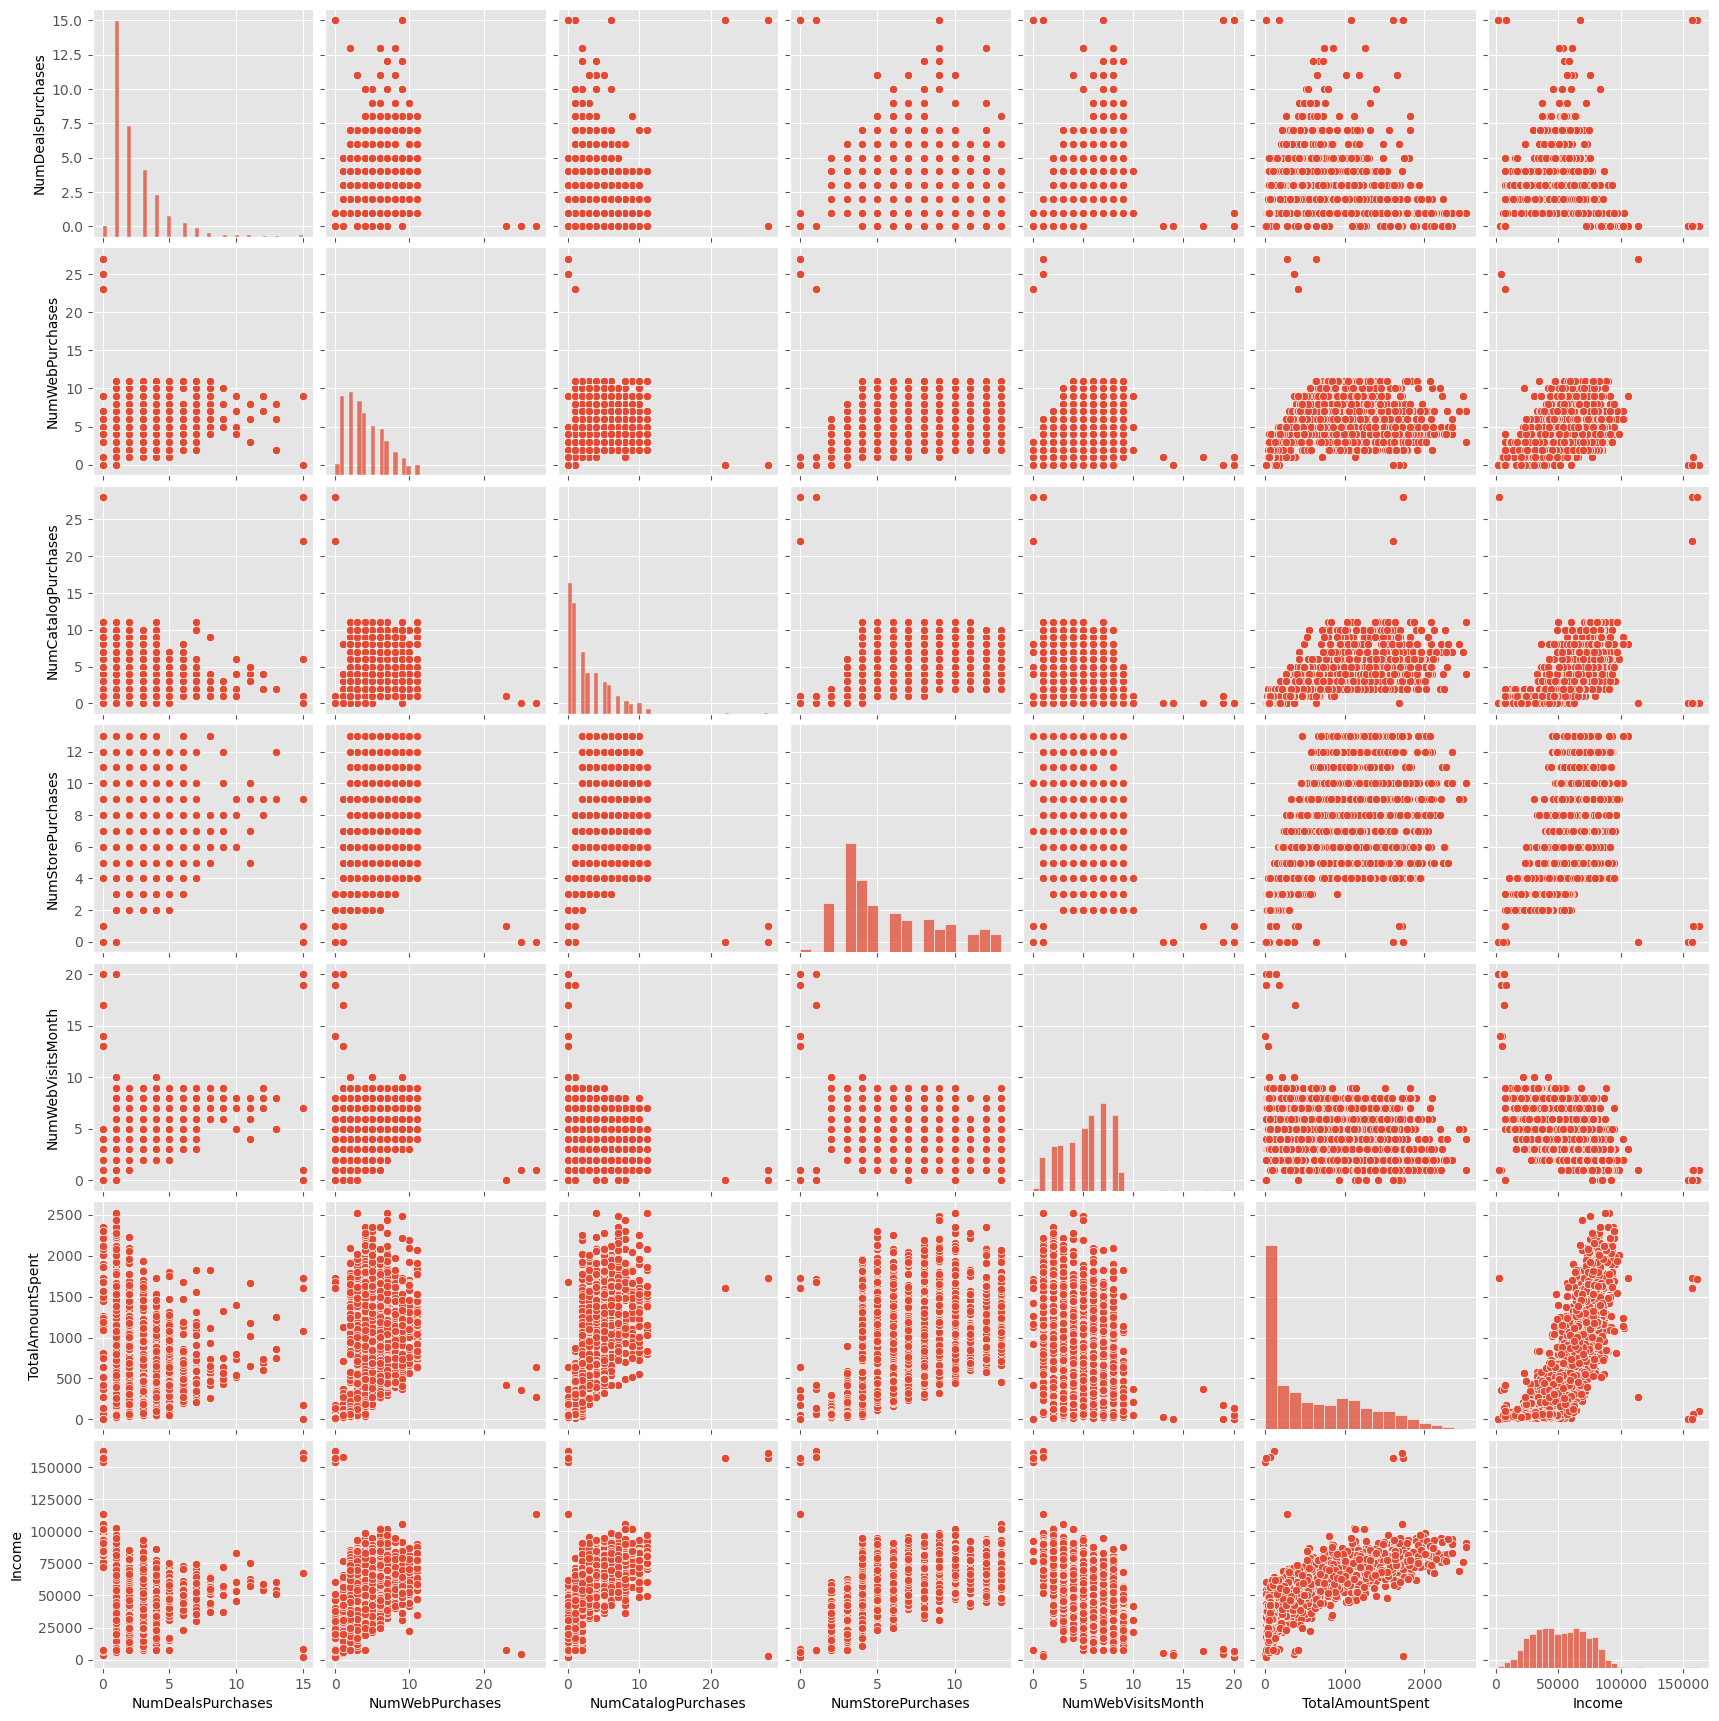

In [109]:
correlation = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth', \
'TotalAmountSpent', 'Income']]
sns.pairplot(correlation);

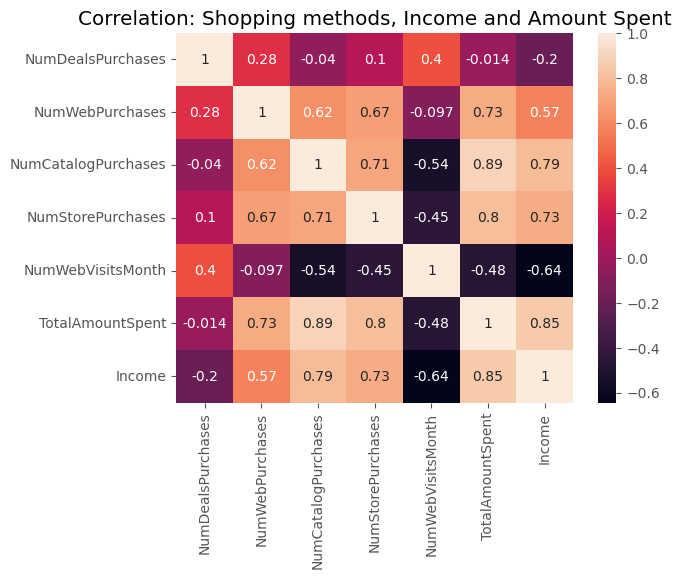

In [129]:
sns.heatmap(correlation.corr(method='spearman'), annot=True)
plt.title('Correlation: Shopping methods, Income and Amount Spent');

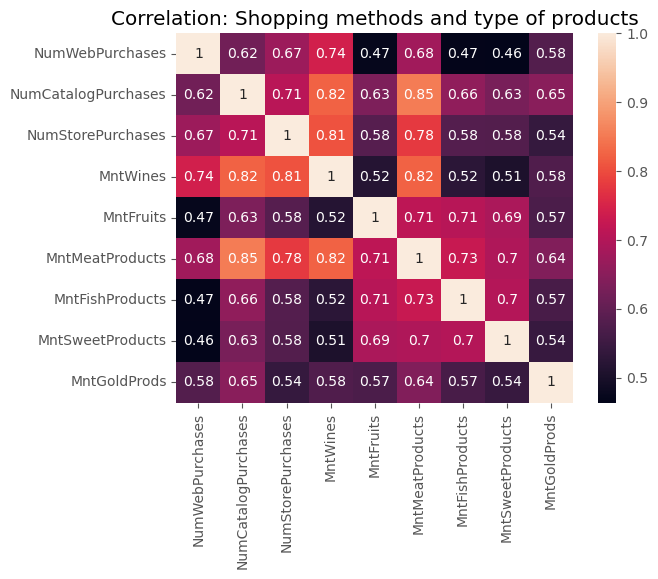

In [139]:
correlation2 = df[['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases','MntWines', 'MntFruits', 'MntMeatProducts',
'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
sns.heatmap(correlation2.corr(method='spearman'), annot=True)
plt.title('Correlation: Shopping methods and type of products');

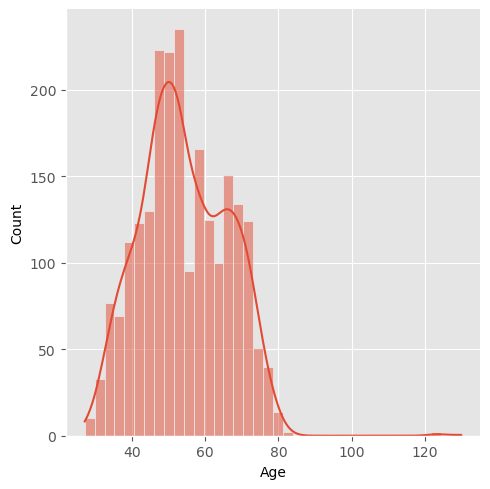

In [148]:
from datetime import datetime, date
today = date.today()
df['Age'] = today.year - df['Year_Birth']
sns.displot(df['Age'], kde = True);

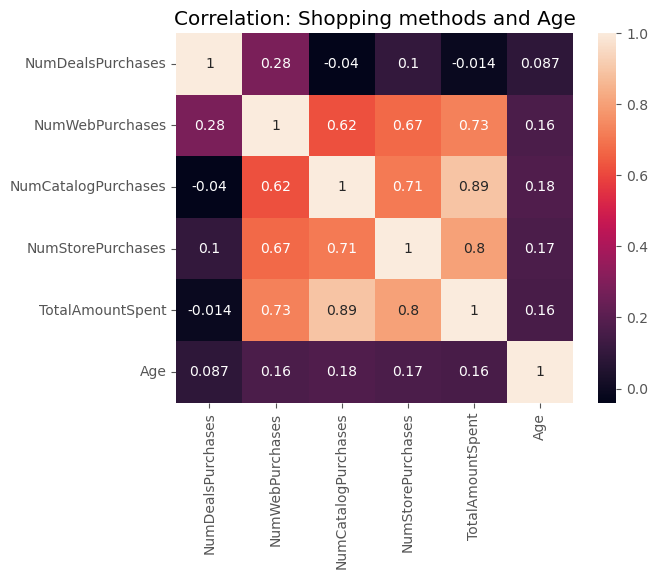

In [151]:
correlation3 = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases','TotalAmountSpent', 'Age']]
sns.heatmap(correlation3.corr(method='spearman'), annot=True)
plt.title('Correlation: Shopping methods and Age');

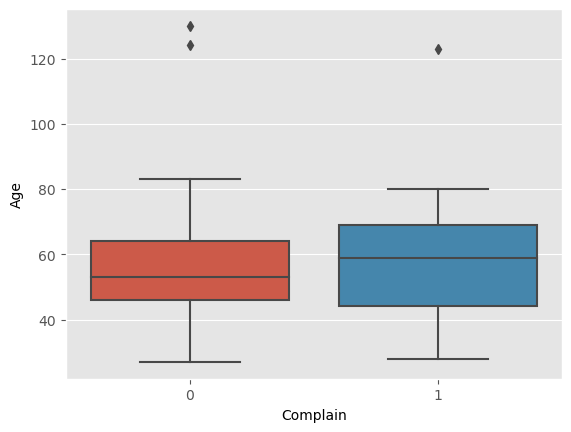

In [156]:
sns.boxplot(y=df["Age"], x=df["Complain"] )
plt.show()

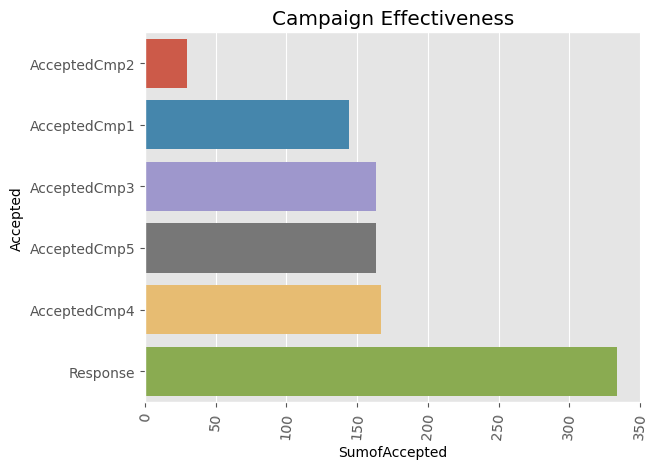

In [172]:
AcceptedCampaign=(df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5", "Response"]].\
sum(axis=0).reset_index(name="SumofAccepted").rename(columns={'index':'Accepted'}).sort_values(by="SumofAccepted"))
sns.barplot(x="SumofAccepted", y="Accepted", data=AcceptedCampaign)
plt.xticks(rotation=85)
plt.title('Campaign Effectiveness')
plt.show()